In [1]:
# Removing row with NaN value in Details column
import pandas as pd

data = pd.read_csv('C:\Degree\Sem 6\CSC650\FYP - Text Classification\Dataset\data1.2.csv')
data_cleaned = data.dropna(subset=['Details'])

# Sort the DataFrame by the 'Place' column
data_cleaned_sorted = data_cleaned.sort_values(by='Place', ascending=True)

# Save the sorted DataFrame to a new CSV file
data_cleaned_sorted.to_csv('data1.3.csv', index=False)

# Display the first 2 rows of the sorted DataFrame
data_cleaned_sorted.head(3)

,Place,Details,Class,WordCount
427,25th of April Bridge,"On April 25, the bridge spanned both sides of ...",None Related,183
236,3D Black Art,Myeongdong 3D Art Museum uses ultra-realistic ...,None Related,181
721,3billion,Company that offers genetic testing for rare d...,bioinformatic,20


# From data1.3.csv
## Clean data using NLTK
#

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy

# Download NLTK resources (run only once)
# nltk.download('stopwords')
# nltk.download('punkt')


In [3]:
import pandas as pd
data = pd.read_csv('data1.3.csv')

# Preprocess the 'Details' column
stop_words = set(nltk.corpus.stopwords.words('english'))

# Add custom stop words
custom_stop_words = {'also', 'located', 'many', 'one', 'see', 'built', 'african', 'africa', 'people'}
stop_words.update(custom_stop_words)

# Function for cleaning text data
def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    #stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    # Join the tokens back into a string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

In [4]:
# Apply the cleaning function to the 'Details' column
data['Cleaned_Details'] = data['Details'].apply(clean_text)
data.head(15)


,Place,Details,Class,WordCount,Cleaned_Details
0,25th of April Bridge,"On April 25, the bridge spanned both sides of ...",None Related,183,april 25 bridge spanned sides tejo river conne...
1,3D Black Art,Myeongdong 3D Art Museum uses ultra-realistic ...,None Related,181,myeongdong 3d art museum uses 3d dislocation p...
2,3billion,Company that offers genetic testing for rare d...,bioinformatic,20,company offers genetic testing rare diseases m...
3,63 Building,63 City is a skyscraper on Seoul's Yeouido Isl...,None Related,106,63 city skyscraper seoul yeouido island overlo...
4,ABB,ABB’s portfolio of robotics products serves se...,robotic,36,abb portfolio robotics products serves several...
5,ACEINNA,ACEINNA as a MEMS sensor and sensing solution ...,robotic,23,aceinna mems sensor sensing solution company f...
6,AI SpaceFactory,focused on creating groundbreaking technology ...,aerospace,54,focused creating groundbreaking technology fac...
7,AJ Hackett Kawarau Bungy Centre,Bungee jumping is an insanely exciting high-al...,None Related,96,bungee jumping insanely exciting jumping activ...
8,AMP Robotics,Puts AI to work to automate recycling. The AI ...,robotic,31,puts ai work automate recycling ai platform po...
9,ARGUS International,provides a variety of aviation safety and soft...,aerospace,60,provides variety aviation safety software serv...


In [5]:
# Display the updated DataFrame
data.to_csv('data1.4.csv')
data.head(3)

,Place,Details,Class,WordCount,Cleaned_Details
0,25th of April Bridge,"On April 25, the bridge spanned both sides of ...",None Related,183,april 25 bridge spanned sides tejo river conne...
1,3D Black Art,Myeongdong 3D Art Museum uses ultra-realistic ...,None Related,181,myeongdong 3d art museum uses 3d dislocation p...
2,3billion,Company that offers genetic testing for rare d...,bioinformatic,20,company offers genetic testing rare diseases m...


# From data1.4.csv
## Read Place and Cleaned_details()
#

In [6]:
import pandas as pd

data = pd.read_csv('data1.4.csv')
column_to_read = ['Place', 'Cleaned_Details', 'Class', 'WordCount']
selected = data[column_to_read].copy()
selected.rename(columns={'Cleaned_Details': "Details"}, inplace=True)
# selected.to_csv('data1.5.csv', index=False)
print(selected.head(5))

                  Place                                            Details  \
0  25th of April Bridge  april 25 bridge spanned sides tejo river conne...   
1          3D Black Art  myeongdong 3d art museum uses 3d dislocation p...   
2              3billion  company offers genetic testing rare diseases m...   
3           63 Building  63 city skyscraper seoul yeouido island overlo...   
4                   ABB  abb portfolio robotics products serves several...   

           Class  WordCount  
0   None Related        183  
1   None Related        181  
2  bioinformatic         20  
3   None Related        106  
4        robotic         36  


# data1.5.csv
## Tokenize Details
#

In [7]:
import nltk
from nltk.tokenize import word_tokenize

# Sample DataFrame
# data = pd.read_csv('data1.5.csv')
column_to_read = ['Place', 'Details', 'Class', 'WordCount']
selected = selected[column_to_read].copy()

# Tokenize the 'Details' column
selected['Tokenized_Details'] = selected['Details'].apply(word_tokenize)

# Display the DataFrame with tokenized details
print(selected[['Place', 'Tokenized_Details','Class', 'WordCount']].head(3))

# selected.to_csv('data1.6.csv')


                  Place                                  Tokenized_Details  \
0  25th of April Bridge  [april, 25, bridge, spanned, sides, tejo, rive...   
1          3D Black Art  [myeongdong, 3d, art, museum, uses, 3d, disloc...   
2              3billion  [company, offers, genetic, testing, rare, dise...   

           Class  WordCount  
0   None Related        183  
1   None Related        181  
2  bioinformatic         20  


# data1.6.csv
## Read Place and Tokenized_details()
#

In [8]:
column_to_read = ['Place', 'Tokenized_Details', 'Class', 'WordCount']

# Assuming 'selected' is your original DataFrame
selected = selected[column_to_read].copy()

# Rename 'Tokenized_Details' to 'Details'
selected.rename(columns={'Tokenized_Details': 'Details'}, inplace=True)

# Save the DataFrame to a new CSV file
selected.to_csv('data1.7.csv', index=False)

# Display the first 3 rows of the updated DataFrame
selected.head(3)


,Place,Details,Class,WordCount
0,25th of April Bridge,"[april, 25, bridge, spanned, sides, tejo, rive...",None Related,183
1,3D Black Art,"[myeongdong, 3d, art, museum, uses, 3d, disloc...",None Related,181
2,3billion,"[company, offers, genetic, testing, rare, dise...",bioinformatic,20


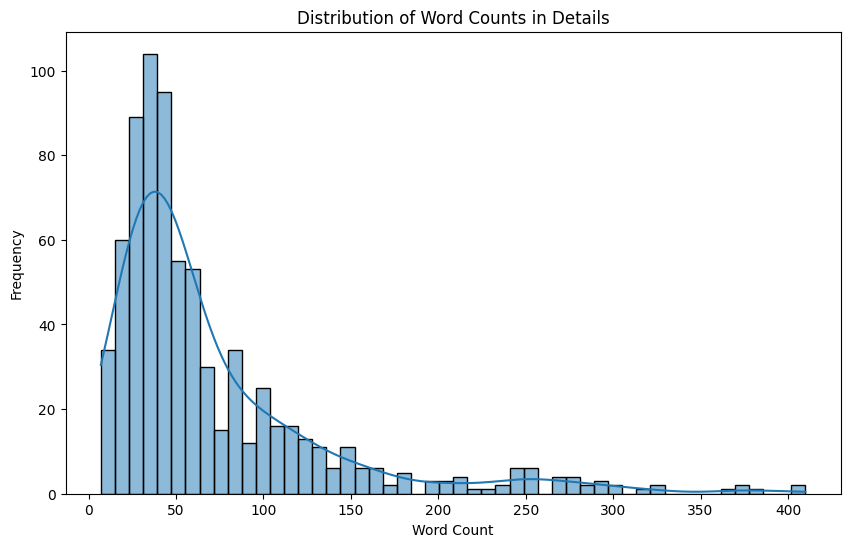

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Details' column contains lists
selected['WordCount'] = selected['Details'].apply(lambda x: len(' '.join(x).split()))

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(selected['WordCount'], bins=50, kde=True)
plt.title('Distribution of Word Counts in Details')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()



In [10]:
import spacy
import pandas as pd
from collections import Counter

# Assuming you have already loaded your data and spaCy model
data = pd.read_csv('data1.7.csv')
nlp = spacy.load("en_core_web_sm")

# Concatenate 'Place' and 'Details' columns
column_to_read = data['Details']

# Apply SpaCy pipeline to each text in the column
docs = column_to_read.apply(nlp)

# Calculate word counts
data['Word_Count'] = docs.apply(lambda doc: len(doc))

# Most Common Words
all_words = ' '.join(column_to_read).split()
word_counts = Counter(all_words)

# Print most common words
most_common_words = word_counts.most_common(10)
print("Most Common Words:")
for word, count in most_common_words:
    print(f"{word}: {count} times")


Most Common Words:
'park',: 288 times
'island',: 218 times
'world',: 206 times
'water',: 203 times
'museum',: 194 times
'sea',: 181 times
'lake',: 177 times
'city',: 175 times
'take',: 173 times
'company',: 171 times


In [11]:
# Rank Entity Locations
entity_locations = []
for doc in docs:
    entity_locations.extend([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

ranked_locations = Counter(entity_locations).most_common()
print("Ranked Entity Locations:")
for location, count in ranked_locations:
    print(f"{location}: {count} times")

Ranked Entity Locations:
paris: 95 times
tokyo: 35 times
france: 30 times
malaysia: 28 times
japan: 23 times
china: 19 times
egypt: 16 times
brazil: 9 times
cairo: 9 times
india: 8 times
jakarta: 7 times
rome: 7 times
wellington: 6 times
morocco: 5 times
kenya: 4 times
pathai: 3 times
boston: 3 times
germany: 2 times
poland: 2 times
colorado: 2 times
italy: 2 times
california: 2 times
cheguri: 2 times
hemophilia: 1 times
virginia: 1 times
denver: 1 times
namibia: 1 times
pakistan: 1 times
anesthesia: 1 times
london: 1 times
singapore: 1 times
neurala: 1 times
florida: 1 times
spain: 1 times
cambodia: 1 times
berisha: 1 times
wisteria: 1 times
holland: 1 times
netherlands: 1 times
orlando: 1 times


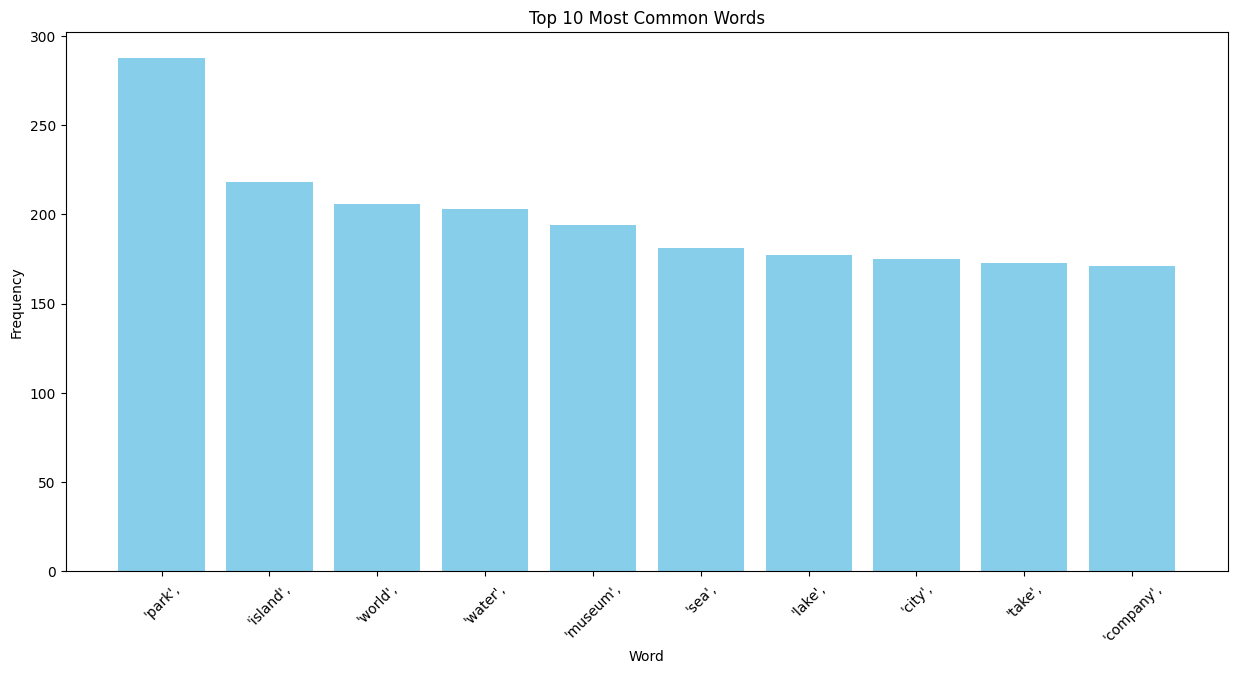

In [12]:
import matplotlib.pyplot as plt
import joblib
from collections import Counter

# Most Common Words
plt.figure(figsize=(15, 7))
plt.bar(*zip(*most_common_words), color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()






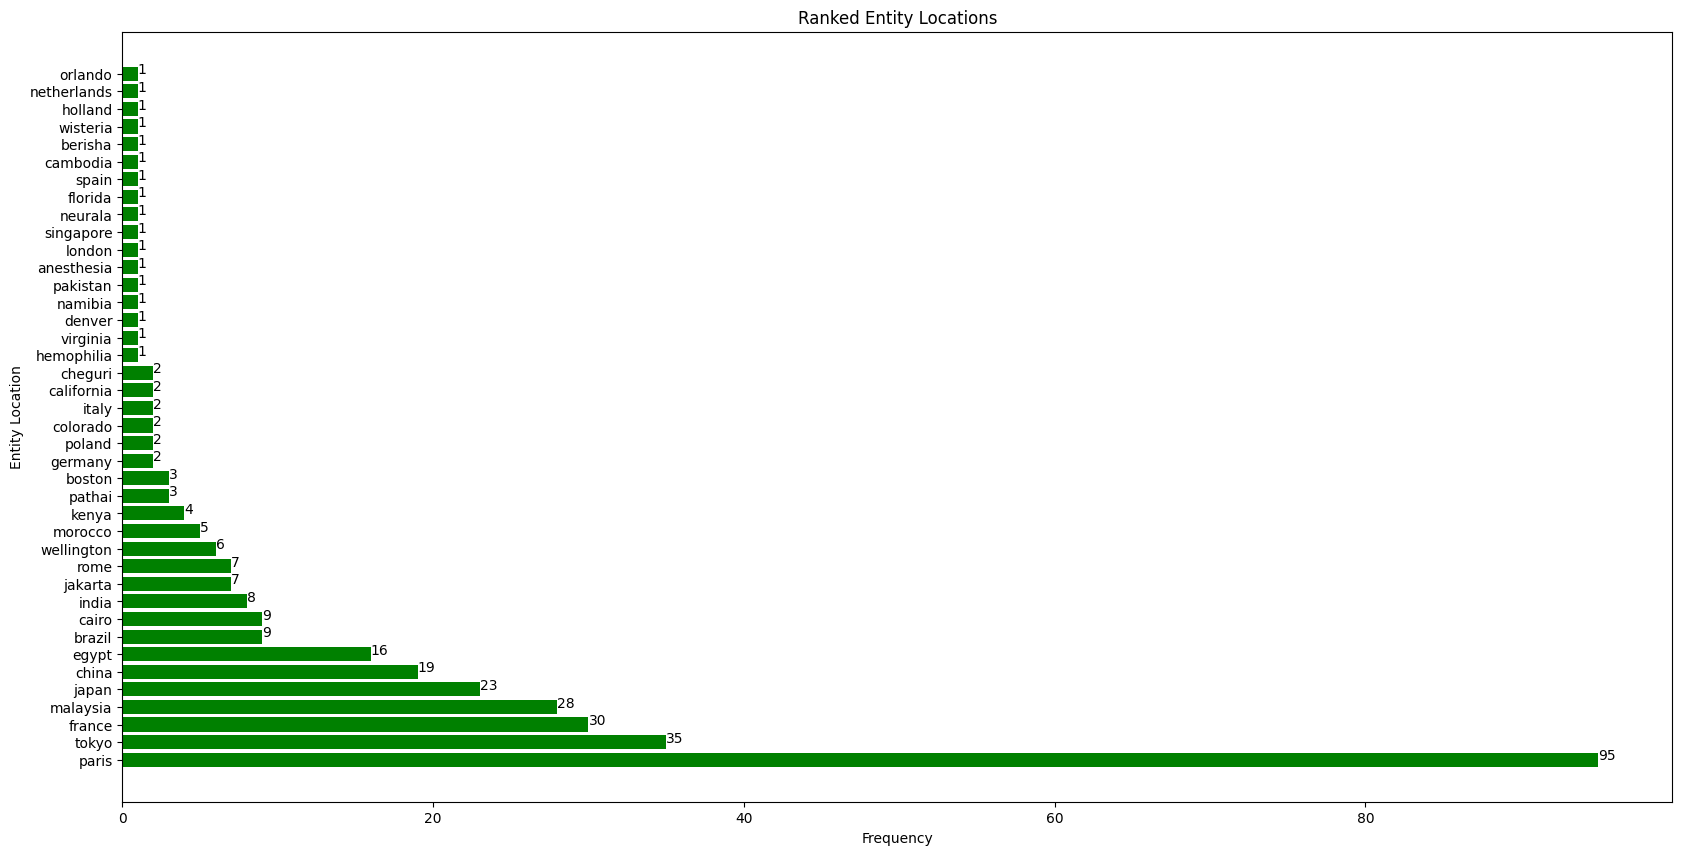

In [13]:
import matplotlib.pyplot as plt 
from collections import Counter



# Rank Entity Locations
plt.figure(figsize=(20, 10))
locations, counts = zip(*ranked_locations)
plt.barh(locations, counts, color='green')
plt.title('Ranked Entity Locations')
plt.xlabel('Frequency')
plt.ylabel('Entity Location')

# Add frequency values to each bar
for index, value in enumerate(counts):
    plt.text(value, index, str(value))
    
plt.show()



In [14]:
import os
import pickle

# Assuming you have a variable named 'ranked_locations' with the data you want to save

# Save data separately
with open("ranked_locations.pkl", "wb") as f:
    pickle.dump(ranked_locations, f)


In [15]:
# # KIV getting Learning to rank algorithm to replace this 
# #
# #


# import pandas as pd
# import spacy
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error

# # Load spaCy model
# nlp = spacy.load("en_core_web_sm")

# # Sample DataFrame
# data = pd.read_csv('data1.7.csv')

# # Choose a reference word
# reference_word = "example"

# # Function to calculate similarity between two words
# def calculate_similarity(word1, word2):
#     return nlp(word1).similarity(nlp(word2))

# # Calculate similarity scores for each word in 'Details' with the reference word
# data['Similarity'] = data['Details'].apply(lambda details: calculate_similarity(reference_word, details))

# # Manually assign ranking labels based on similarity scores (modify as needed)
# data['Ranking_Label'] = data['Similarity'].rank(ascending=False)

# # Prepare the data for learning-to-rank
# X = data[['Similarity']]
# y = data['Ranking_Label']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a learning-to-rank model (Random Forest Regressor in this example)
# model = RandomForestRegressor()
# model.fit(X_train, y_train)

# # Make predictions on the test set
# predictions = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, predictions)
# print(f'Mean Squared Error: {mse}')

# # Rank the words based on the learned model
# data['Predicted_Rank'] = model.predict(X)

# # Display the resulting DataFrame with similarity, manual rank, and predicted rank
# print(data[['Details', 'Similarity', 'Ranking_Label', 'Predicted_Rank']])


In [16]:
# import pandas as pd
# import spacy
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error

# # Load spaCy model
# nlp = spacy.load("en_core_web_sm")

# # Sample DataFrame
# data = pd.read_csv('data1.7.csv')

# # Word to compare similarity to
# comparison_word = "Paris"

# # Calculate similarity scores
# data['Similarity'] = data['Details'].apply(lambda details: nlp(details).similarity(nlp(comparison_word)))

# # Assign ranking labels
# data['Ranking_Label'] = data['Similarity'].rank(ascending=False)

# # Prepare data for learning-to-rank
# X = data[['Similarity']]
# y = data['Ranking_Label']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a learning-to-rank model (Random Forest Regressor in this example)
# model = RandomForestRegressor()
# model.fit(X_train, y_train)

# # Predict rankings on the test set
# predictions = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, predictions)
# print(f'Mean Squared Error: {mse}')

# # Predict rankings for all data
# data['Predicted_Rank'] = model.predict(X)

# # Sort the DataFrame based on predicted rankings
# sorted_data = data.sort_values(by='Predicted_Rank')

# # Display the resulting DataFrame
# print(sorted_data[['Details', 'Similarity', 'Ranking_Label', 'Predicted_Rank']])
